# <center> Open Project :<br> <small>Réda DEHAK<br> December, 2022 <br> Deadline:  January 15th 23h59 </small></center>

# Part 1:

The dataset for training and testing your methods can be downloaded from the Teams group or on the UCI website https://archive.ics.uci.edu/ml/datasets/Air+Quality. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

### Attributes Information:

    0- Date (DD/MM/YYYY) 
    1- Time (HH.MM.SS) 
    2- True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
    3- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 
    4- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
    5- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
    6- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 
    7- True hourly averaged NOx concentration in ppb (reference analyzer) 
    8- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
    9- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 
    10- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 
    11- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
    12- Temperature in Â°C 
    13- Relative Humidity (%) 
    14- AH Absolute Humidity 

- Propose a solution to predict the ground truth parameters using the other sensor responses features? 

- Demonstrate that there is a relationship (linear or nolinear) between these parameters?

## EDA

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_excel("Part1data/AirQualityUCI.xlsx")
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [3]:
df.describe().T

count                           mean                  min  \
Date             9357  2004-09-21 04:30:05.193972480  2004-03-10 00:00:00   
CO(GT)         9357.0                     -34.207524               -200.0   
PT08.S1(CO)    9357.0                    1048.869652               -200.0   
NMHC(GT)       9357.0                    -159.090093               -200.0   
C6H6(GT)       9357.0                       1.865576               -200.0   
PT08.S2(NMHC)  9357.0                     894.475963               -200.0   
NOx(GT)        9357.0                       168.6042               -200.0   
PT08.S3(NOx)   9357.0                     794.872333               -200.0   
NO2(GT)        9357.0                      58.135898               -200.0   
PT08.S4(NO2)   9357.0                    1391.363266               -200.0   
PT08.S5(O3)    9357.0                     974.951534               -200.0   
T              9357.0                         9.7766               -200.0   
RH             9357.0                      39.483611               -200.0   
AH             9357.0                      -6.837604               -200.0   

                               25%                  50%                  75%  \
Date           2004-06-16 00:00:00  2004-09-21 00:00:00  2004-12-28 00:00:00   
CO(GT)                         0.6                  1.5                  2.6   
PT08.S1(CO)                  921.0               1052.5              1221.25   
NMHC(GT)                    -200.0               -200.0               -200.0   
C6H6(GT)                  4.004958             7.886653            13.636091   
PT08.S2(NMHC)                711.0                894.5              1104.75   
NOx(GT)                       50.0                141.0                284.2   
PT08.S3(NOx)                 637.0               794.25               960.25   
NO2(GT)                       53.0                 96.0                133.0   
PT08.S4(NO2)               1184.75               1445.5               1662.0   
PT08.S5(O3)                 699.75                942.0              1255.25   
T                            10.95                 17.2               24.075   
RH                           34.05                48.55               61.875   
AH                        0.692275             0.976823             1.296223   

                               max         std  
Date           2005-04-04 00:00:00         NaN  
CO(GT)                        11.9    77.65717  
PT08.S1(CO)                2039.75  329.817015  
NMHC(GT)                    1189.0  139.789093  
C6H6(GT)                 63.741476   41.380154  
PT08.S2(NMHC)               2214.0  342.315902  
NOx(GT)                     1479.0  257.424561  
PT08.S3(NOx)               2682.75  321.977031  
NO2(GT)                      339.7  126.931428  
PT08.S4(NO2)                2775.0  467.192382  
PT08.S5(O3)                2522.75  456.922728  
T                             44.6   43.203438  
RH                          88.725   51.215645  
AH                        2.231036    38.97667

### Missing Value

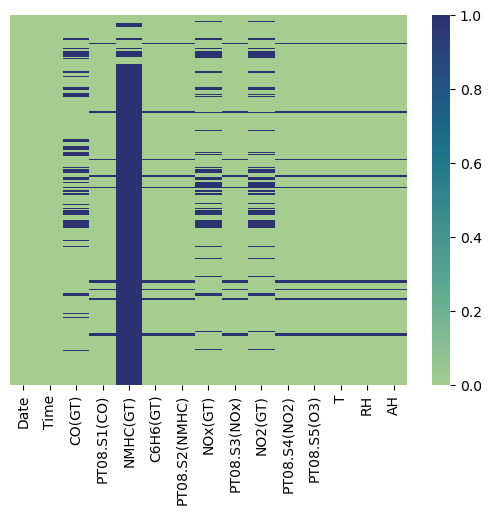

In [4]:
# Missing values are tagged with -200 value.
df.replace(to_replace=-200, value=np.nan, inplace=True)
sns.heatmap(df.isna(), yticklabels=False, cmap="crest")
plt.show()

In [5]:
df.drop(columns=["NMHC(GT)", "Date", "Time"], inplace=True)
# Use the mean to fill the missing values
df.fillna(df.mean(), inplace=True)
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
df.head()

CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6      1360.00  11.881723        1045.50    166.0       1056.25   
1     2.0      1292.25   9.397165         954.75    103.0       1173.75   
2     2.2      1402.00   8.997817         939.25    131.0       1140.00   
3     2.2      1375.50   9.228796         948.25    172.0       1092.00   
4     1.6      1272.25   6.518224         835.50    131.0       1205.00   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T         RH        AH  
0    113.0       1692.00      1267.50  13.60  48.875001  0.757754  
1     92.0       1558.75       972.25  13.30  47.700000  0.725487  
2    114.0       1554.50      1074.00  11.90  53.975000  0.750239  
3    122.0       1583.75      1203.25  11.00  60.000000  0.786713  
4    116.0       1490.00      1110.00  11.15  59.575001  0.788794

### Outliers

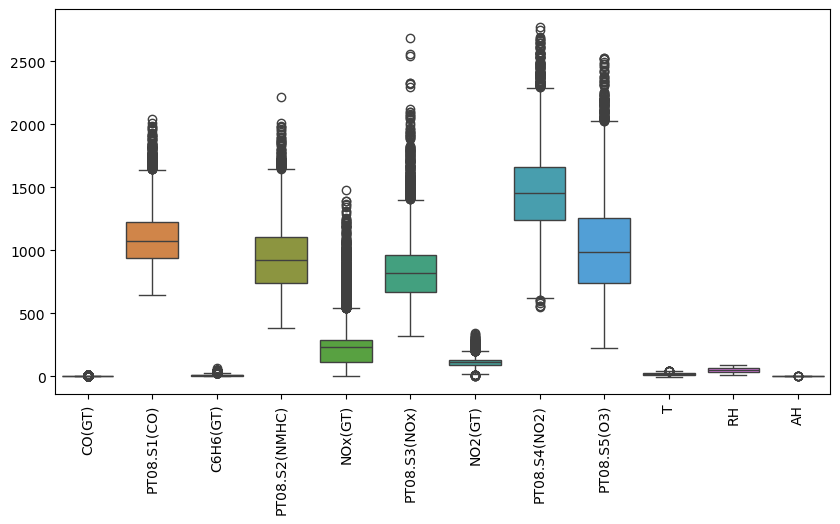

In [7]:
# plotting a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation="vertical")
plt.show()

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Finding outliers
mask = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
mask.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)  \
6   1.20000      1185.00  3.624399         689.50   62.000000       1461.75   
7   1.00000      1136.25  3.326677         672.00   62.000000       1453.25   
8   0.90000      1094.00  2.339416         608.50   45.000000       1579.00   
9   0.60000      1009.75  1.696658         560.75  246.881252       1705.00   
10  2.15275      1011.00  1.293620         526.75   21.000000       1817.50   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T         RH        AH  
6    77.000000       1332.75       732.50  11.325  56.775000  0.760312  
7    76.000000       1332.75       729.50  10.675  60.000000  0.770238  
8    60.000000       1276.00       619.50  10.650  59.674999  0.764819  
9   113.075515       1234.75       501.25  10.250  60.200001  0.751657  
10   34.000000       1196.75       445.25  10.075  60.474999  0.746495

In [9]:
# replace outliers with median
for col in df.columns:
    df.loc[mask.index, col] = df[col].median()
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1).sum()

0

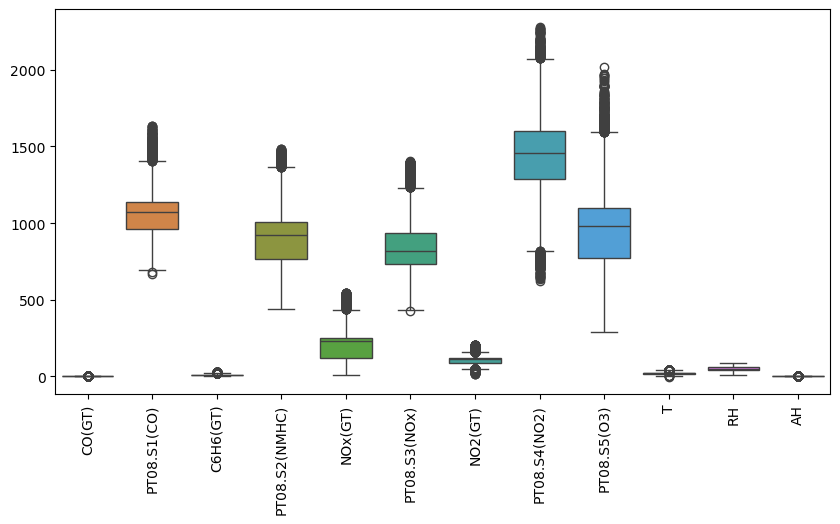

In [10]:
# plotting a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation="vertical")
plt.show()

### Normalization

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0  0.827182     1.869191  0.633292       0.726926 -0.365231      1.201812   
1  0.100408     1.436945  0.132000       0.260953 -0.968173      1.861989   
2  0.342666     2.137152  0.051426       0.181366 -0.700199      1.672364   
3  0.342666     1.968082  0.098029       0.227578 -0.307808      1.402674   
4 -0.384108     1.309345 -0.448864      -0.351358 -0.700199      2.037568   

    NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0  0.189333      0.895110     1.083507 -0.655037  0.024321 -0.771880  
1 -0.478032      0.428920     0.037346 -0.692335 -0.050488 -0.859938  
2  0.221112      0.414051     0.397877 -0.866395  0.349020 -0.792388  
3  0.475346      0.516385     0.855849 -0.978290  0.732610 -0.692849  
4  0.284670      0.188390     0.525436 -0.959641  0.705552 -0.687168

### Correlation

In [12]:
df.corr()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.704003  0.761299       0.765143  0.597829   
PT08.S1(CO)    0.704003     1.000000  0.835697       0.842248  0.471329   
C6H6(GT)       0.761299     0.835697  1.000000       0.987025  0.455321   
PT08.S2(NMHC)  0.765143     0.842248  0.987025       1.000000  0.466442   
NOx(GT)        0.597829     0.471329  0.455321       0.466442  1.000000   
PT08.S3(NOx)  -0.606309    -0.762365 -0.749689      -0.787330 -0.563323   
NO2(GT)        0.564285     0.463357  0.453533       0.475275  0.722891   
PT08.S4(NO2)   0.524728     0.625489  0.747899       0.753179  0.031952   
PT08.S5(O3)    0.679970     0.850330  0.816593       0.825836  0.569112   
T              0.135227     0.122116  0.343613       0.362346 -0.214514   
RH            -0.072062     0.040099 -0.204554      -0.218022  0.142779   
AH             0.078540     0.160722  0.211392       0.218242 -0.133536   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.606309  0.564285      0.524728     0.679970  0.135227   
PT08.S1(CO)       -0.762365  0.463357      0.625489     0.850330  0.122116   
C6H6(GT)          -0.749689  0.453533      0.747899     0.816593  0.343613   
PT08.S2(NMHC)     -0.787330  0.475275      0.753179     0.825836  0.362346   
NOx(GT)           -0.563323  0.722891      0.031952     0.569112 -0.214514   
PT08.S3(NOx)       1.000000 -0.508457     -0.484719    -0.790857 -0.193528   
NO2(GT)           -0.508457  1.000000      0.030256     0.516894 -0.115639   
PT08.S4(NO2)      -0.484719  0.030256      1.000000     0.535113  0.636323   
PT08.S5(O3)       -0.790857  0.516894      0.535113     1.000000  0.030952   
T                 -0.193528 -0.115639      0.636323     0.030952  1.000000   
RH                -0.019499 -0.181381     -0.095843     0.083677 -0.590561   
AH                -0.269181 -0.320328      0.667743     0.109623  0.644047   

                     RH        AH  
CO(GT)        -0.072062  0.078540  
PT08.S1(CO)    0.040099  0.160722  
C6H6(GT)      -0.204554  0.211392  
PT08.S2(NMHC) -0.218022  0.218242  
NOx(GT)        0.142779 -0.133536  
PT08.S3(NOx)  -0.019499 -0.269181  
NO2(GT)       -0.181381 -0.320328  
PT08.S4(NO2)  -0.095843  0.667743  
PT08.S5(O3)    0.083677  0.109623  
T             -0.590561  0.644047  
RH             1.000000  0.170765  
AH             0.170765  1.000000

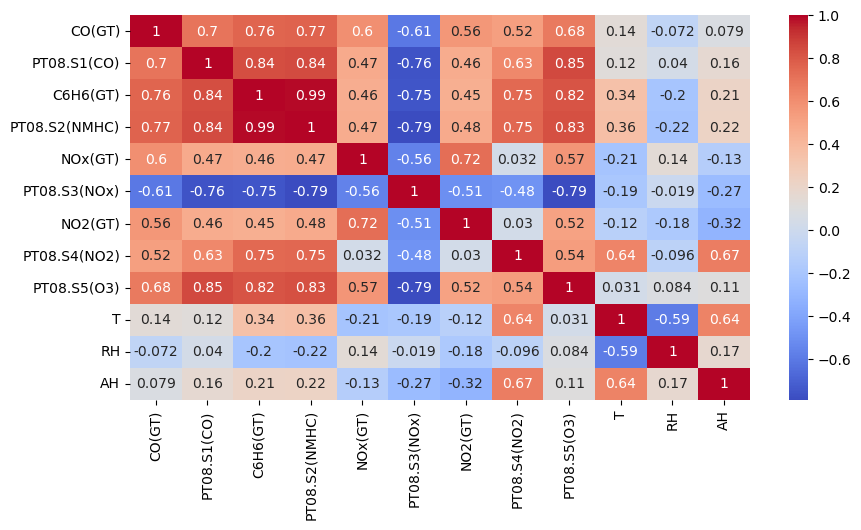

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

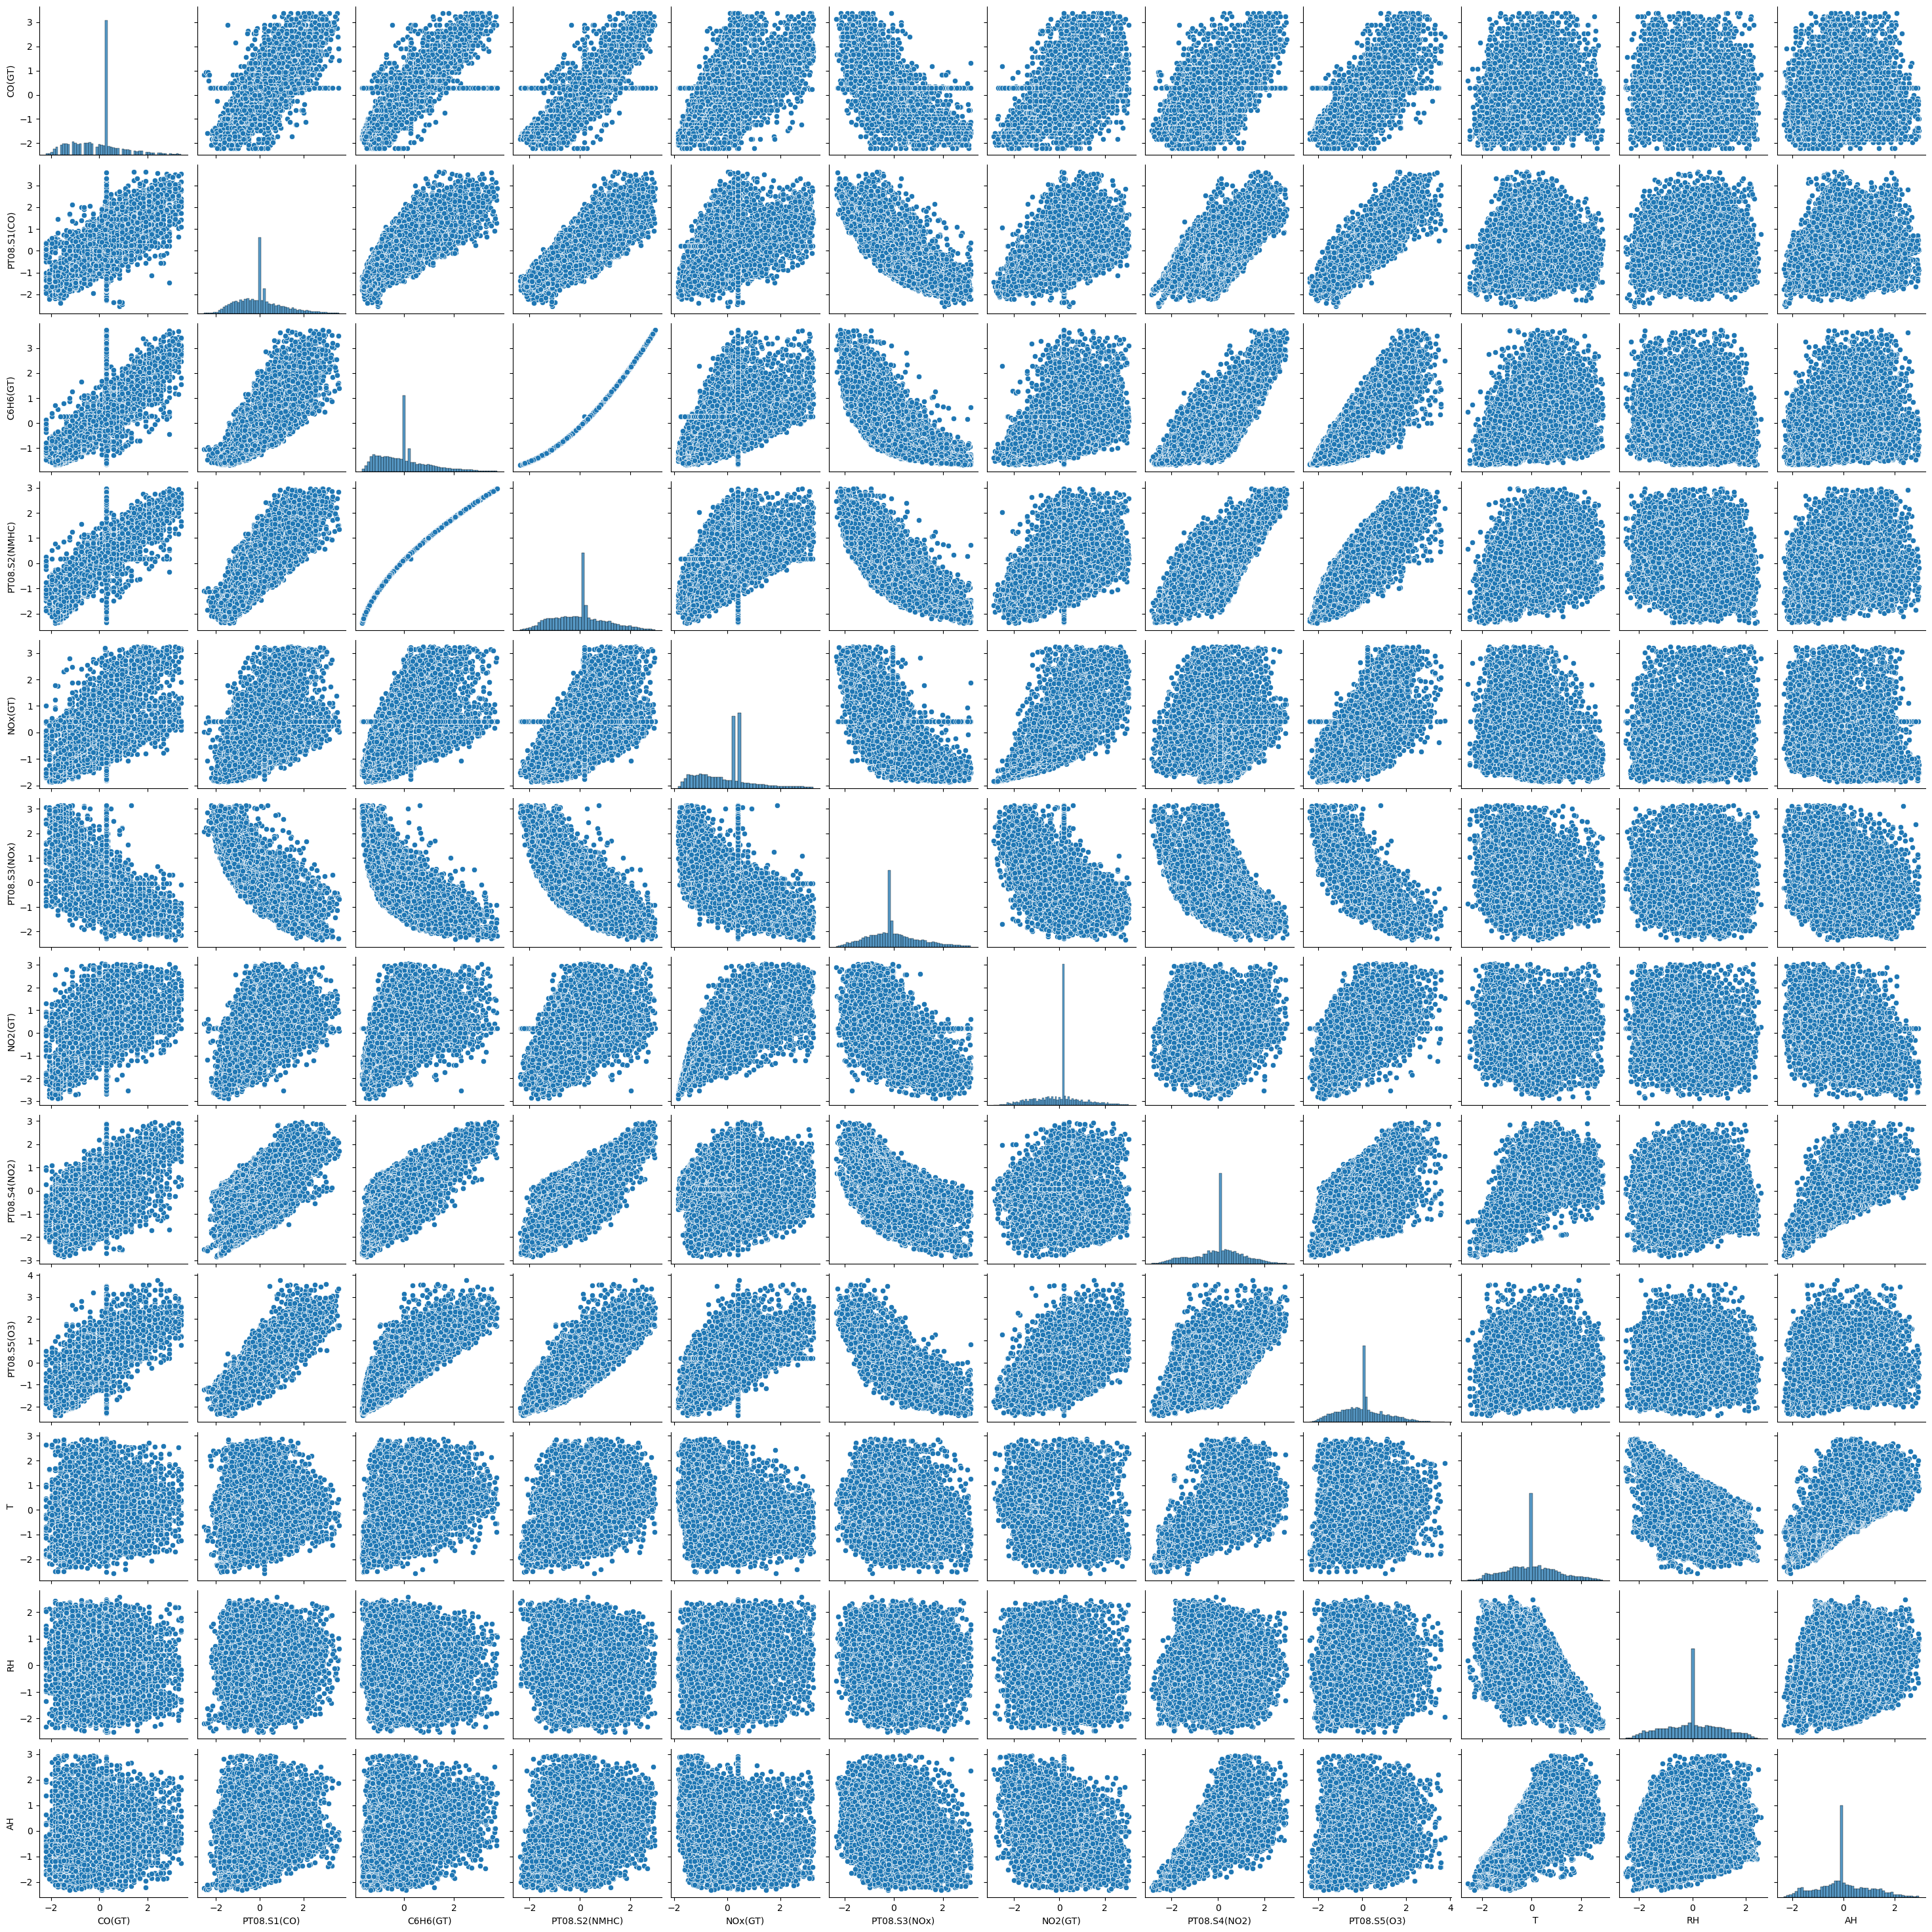

In [14]:
sns.pairplot(df)
plt.show()

## Conclusion of EDA

After the data preprocessing as data cleaning, data normalization and data visualization. Here is the brief report what I did and found:
1. Delete the columns "NMHC(GT)", "Date", "Time" because there are too many NAs or useless for the further analysis
2. Fill NA with the mean 
3. Replace outliers with the median
4. Normalize the dataset
5. Some pairs of the features show the linear relations and the highest pair is C6H6 and NMHC but for the rest pairs there are poor linear or non-linear relations

## Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

lrr = MultiOutputRegressor(LinearRegression())
rfr = RandomForestRegressor()
sgr = MultiOutputRegressor(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty="l2", random_state=42)
)
svr_linear = MultiOutputRegressor(SVR(kernel="linear"))
svr_poly = MultiOutputRegressor(SVR(kernel="poly", degree=2))
svr_rbf = MultiOutputRegressor(SVR(kernel="rbf"))

TARGETS = ["CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)"]
FEATURES = list(set(df.columns) - set(TARGETS))

X = df[FEATURES]
y = df[TARGETS]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
def evaluate(model, X_train, y_train, X_test, y_test, degree=1):
    model_name = get_model_name(model)
    if degree > 1:
        poly = PolynomialFeatures(degree=degree)
        X_train = poly.fit_transform(X_train)
        X_test = poly.fit_transform(X_test)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    print(f"Model: {model_name}, Feature Degree: {degree}, MAE: {mae}, MSE: {mse}")


def get_model_name(model):
    if isinstance(model, MultiOutputRegressor):
        return f"MultiOutputRegressor({type(model.estimator).__name__})"
    else:
        return type(model).__name__


evaluate(lrr, X_train, y_train, X_test, y_test, degree=1)
evaluate(lrr, X_train, y_train, X_test, y_test, degree=2)
evaluate(rfr, X_train, y_train, X_test, y_test, degree=1)
evaluate(rfr, X_train, y_train, X_test, y_test, degree=2)
evaluate(sgr, X_train, y_train, X_test, y_test, degree=2)
evaluate(svr_linear, X_train, y_train, X_test, y_test, degree=2)
evaluate(svr_poly, X_train, y_train, X_test, y_test, degree=2)
evaluate(svr_rbf, X_train, y_train, X_test, y_test, degree=2)

Model: MultiOutputRegressor(LinearRegression), Feature Degree: 1, MAE: 0.39705511753076034, MSE: 0.32277875954411794
Model: MultiOutputRegressor(LinearRegression), Feature Degree: 2, MAE: 0.3430197547801343, MSE: 0.28189301543657364
Model: RandomForestRegressor, Feature Degree: 1, MAE: 0.303088347846151, MSE: 0.24089608729845052
Model: RandomForestRegressor, Feature Degree: 2, MAE: 0.3055527914373997, MSE: 0.2412597508330464
Model: MultiOutputRegressor(SGDRegressor), Feature Degree: 2, MAE: 0.3584639710475449, MSE: 0.29802324947966674
Model: MultiOutputRegressor(SVR), Feature Degree: 2, MAE: 0.33233345384502677, MSE: 0.2991997470952444
Model: MultiOutputRegressor(SVR), Feature Degree: 2, MAE: 0.3523379425985668, MSE: 0.2995464752022558
Model: MultiOutputRegressor(SVR), Feature Degree: 2, MAE: 0.31642681111513227, MSE: 0.2608236619676899


### Conclusion of model

After trying different models, linear regression, random forest regression, SGD, and SVR. The best perfomance came from random forest without feature engining and the linear regression is the poorest one. The rest of the models don't appear too much difference on the performance.

In general, these models perform well from my pespective. It can be chosen according to the use case like online/offline trainning, data size and so on.

# Part 2:

The dataset for training and testing your methods can be downloaded from the Teams group. The goal of this dataset is to classify people described by a set of attributes as good or bad credit risks. you will find two files:

    - data.txt: provides the examples with the last column for class category (1 or 2)
    - readme.data.txt: describes the information regarding this dataset
    
    1- Propose two differents methods to solve this problem, you should compare the performance of the classification. you must show all the experiments that you have made.

    2- Propose a solution to improve the resulting performances.

## EDA

In [18]:
df = pd.read_csv("Part2data/data.txt", sep=" ", header=None)
df.head()

0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3   1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   

   22  23  24  
0   0   1   1  
1   0   1   2  
2   1   0   1  
3   0   1   1  
4   0   1   2  

[5 rows x 25 columns]

In [19]:
df.describe().T

count      mean        std   min   25%   50%   75%    max
0   800.0   2.58250   1.242023   1.0   1.0   2.0   4.0    4.0
1   800.0  20.65125  12.156350   4.0  12.0  18.0  24.0   72.0
2   800.0   2.54750   1.084765   0.0   2.0   2.0   4.0    4.0
3   800.0  31.90875  27.352617   2.0  13.0  23.0  39.0  159.0
4   800.0   2.10625   1.567812   1.0   1.0   1.0   3.0    5.0
5   800.0   3.39750   1.200540   1.0   3.0   3.0   5.0    5.0
6   800.0   2.67375   0.700303   1.0   2.0   3.0   3.0    4.0
7   800.0   2.84125   1.106833   1.0   2.0   3.0   4.0    4.0
8   800.0   2.36625   1.061140   1.0   1.0   2.0   3.0    4.0
9   800.0  35.40625  11.470317  19.0  27.0  33.0  41.0   75.0
10  800.0   2.67625   0.706796   1.0   3.0   3.0   3.0    3.0
11  800.0   1.39625   0.569773   1.0   1.0   1.0   2.0    4.0
12  800.0   1.14750   0.354825   1.0   1.0   1.0   1.0    2.0
13  800.0   1.39875   0.489947   1.0   1.0   1.0   2.0    2.0
14  800.0   1.03375   0.180698   1.0   1.0   1.0   1.0    2.0
15  800.0   0.23000   0.421096   0.0   0.0   0.0   0.0    1.0
16  800.0   0.10125   0.301848   0.0   0.0   0.0   0.0    1.0
17  800.0   0.91000   0.286361   0.0   1.0   1.0   1.0    1.0
18  800.0   0.03750   0.190102   0.0   0.0   0.0   0.0    1.0
19  800.0   0.17500   0.380205   0.0   0.0   0.0   0.0    1.0
20  800.0   0.71250   0.452880   0.0   0.0   1.0   1.0    1.0
21  800.0   0.02125   0.144307   0.0   0.0   0.0   0.0    1.0
22  800.0   0.20125   0.401185   0.0   0.0   0.0   0.0    1.0
23  800.0   0.62875   0.483441   0.0   0.0   1.0   1.0    1.0
24  800.0   1.29875   0.457996   1.0   1.0   1.0   2.0    2.0

In [35]:
df.iloc[:, -1].value_counts()

24
1    756
2     44
Name: count, dtype: int64

### Missing Value

In [20]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

### Outliers

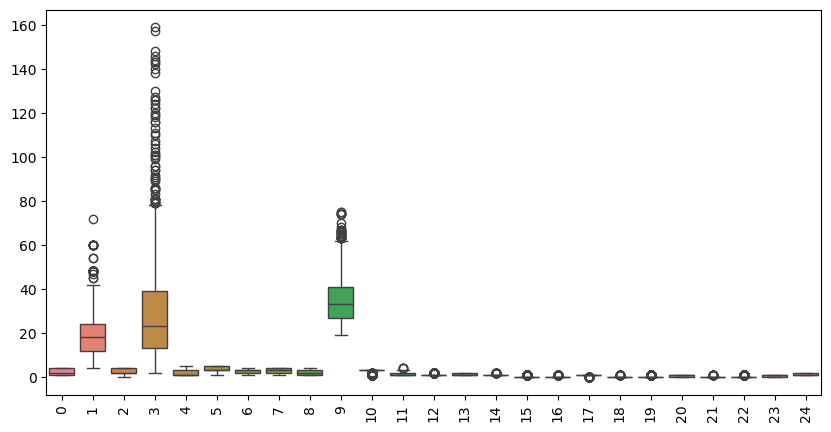

In [21]:
# plotting a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation="vertical")
plt.show()

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Finding outliers
mask = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
mask.head()

0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3   1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   

   22  23  24  
0   0   1   1  
1   0   1   2  
2   1   0   1  
3   0   1   1  
4   0   1   2  

[5 rows x 25 columns]

In [23]:
# replace outliers with median
for col in df.columns:
    df.loc[mask.index, col] = df[col].median()
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1).sum()

0

### Normalization

In [24]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_scaled = pd.concat([X_scaled, y], axis=1)

# check no mislabelled data in the scaled dataset
assert (
    df.loc[df.iloc[:, -1] == 1].index == df_scaled.loc[df_scaled.iloc[:, -1] == 1].index
).all() == True
df_scaled.head()

0         1         2         3        4         5         6   \
0 -0.312949 -0.036362 -0.269718 -0.041444 -0.29434 -0.195317  0.222362   
1 -0.312949 -0.036362 -0.269718 -0.041444 -0.29434 -0.195317  0.222362   
2 -0.312949 -0.036362 -0.269718 -0.041444 -0.29434 -0.195317  0.222362   
3 -0.312949 -0.036362 -0.269718 -0.041444 -0.29434 -0.195317  0.222362   
4 -0.312949 -0.036362 -0.269718 -0.041444 -0.29434 -0.195317  0.222362   

         7         8         9   ...   15   16   17   18   19        20   21  \
0  0.170872 -0.187798 -0.035512  ...  0.0  0.0  0.0  0.0  0.0  0.151717  0.0   
1  0.170872 -0.187798 -0.035512  ...  0.0  0.0  0.0  0.0  0.0  0.151717  0.0   
2  0.170872 -0.187798 -0.035512  ...  0.0  0.0  0.0  0.0  0.0  0.151717  0.0   
3  0.170872 -0.187798 -0.035512  ...  0.0  0.0  0.0  0.0  0.0  0.151717  0.0   
4  0.170872 -0.187798 -0.035512  ...  0.0  0.0  0.0  0.0  0.0  0.151717  0.0   

    22        23  24  
0  0.0  0.172049   1  
1  0.0  0.172049   1  
2  0.0  0.172049   1  
3  0.0  0.172049   1  
4  0.0  0.172049   1  

[5 rows x 25 columns]

### Correlation

In [25]:
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
print("Constant columns:", constant_columns)

Constant columns: [10, 12, 14, 15, 16, 17, 18, 19, 21, 22]


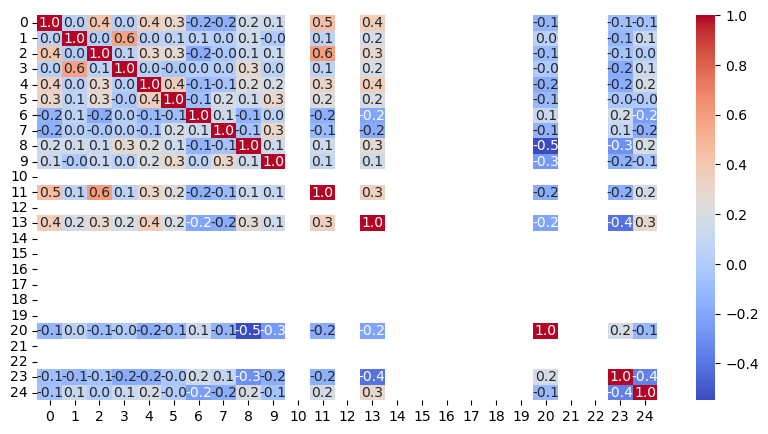

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    df_scaled.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
)
plt.show()

### Dimension Reduction

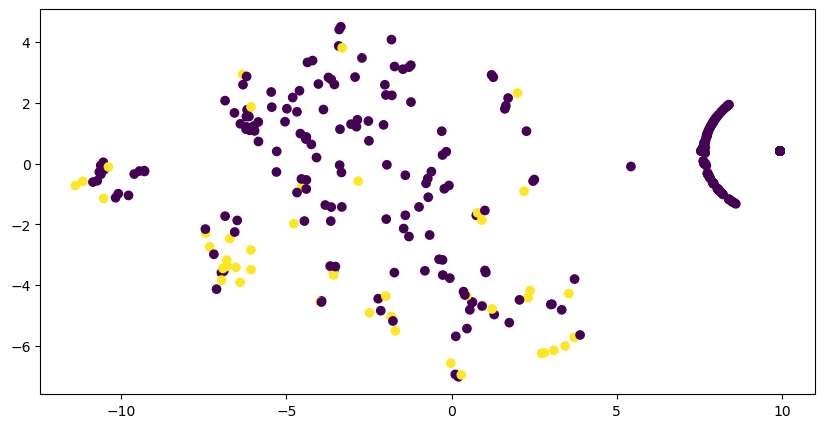

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_scaled.iloc[:, -1])
plt.show()

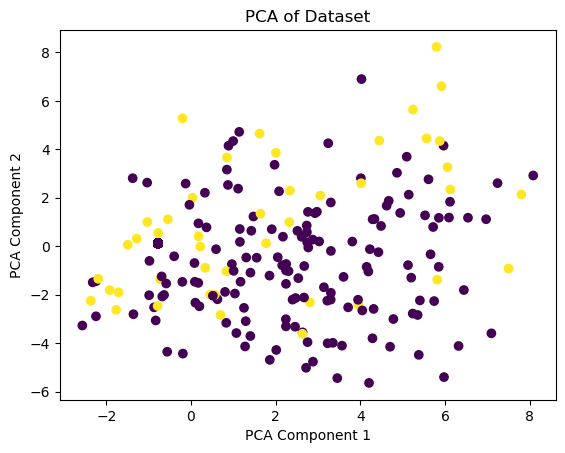

In [28]:
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Dataset")
plt.show()

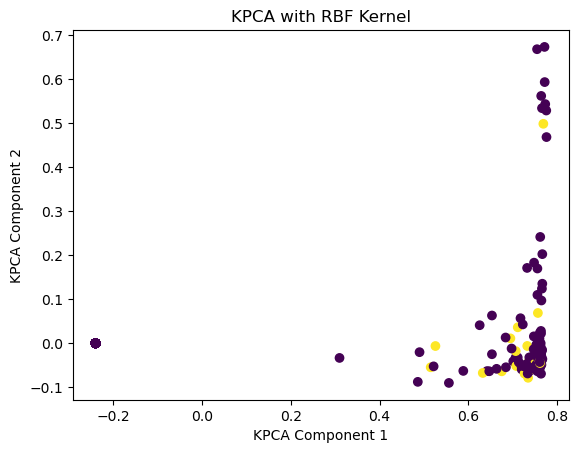

In [29]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)

# Visualize the transformed data
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap="viridis")
plt.xlabel("KPCA Component 1")
plt.ylabel("KPCA Component 2")
plt.title("KPCA with RBF Kernel")
plt.show()

## Conclusion of EDA

After the data preprocessing as data cleaning, data normalization and data visualization. Here is the brief report what I did and found:
1. Very inbalanced dataset
2. No missing values in the dataset
3. Replace outliers with the median
4. Normalize the dataset
5. Some columns are constant columns, by limit of the desprition of dataset, I assume they are catergorical columns after encoding
6. In general, the linear relation between features and targets is poor
7. The next dimension reduction analysis prove it contains a complex non-linear relation
8. In conclusion, I won't apply any feature selections or dimension reduced techniques on the dataset, the cleaned original one will be used as the model input

## First Method:

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    classification_report,
)
from sklearn.preprocessing import LabelEncoder

X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

encoder = LabelEncoder()
y = encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# define a function to evaluate the model

def eval_plot(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(f"test accuracy: {accuracy_score(y_test, y_pred)}")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
    plt.plot([0, 1], [0, 1], "red")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       229
           1       0.21      0.45      0.29        11

    accuracy                           0.90       240
   macro avg       0.59      0.69      0.61       240
weighted avg       0.94      0.90      0.91       240

test accuracy: 0.8958333333333334


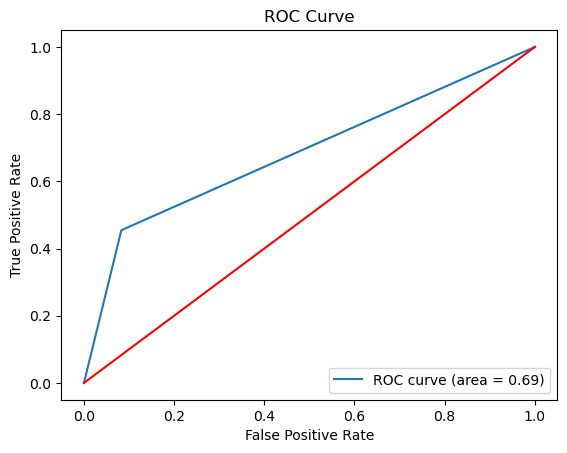

In [38]:
clf_xgb = XGBClassifier(
    learning_rate=0.001,
    max_depth=10,
    n_estimators=100,
    subsample=0.8,
    scale_pos_weight=len(y_train == 0) / sum(y_train == 1),
)
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

eval_plot(y_test, y_pred)

## Second Method:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       229
           1       0.23      0.55      0.32        11

    accuracy                           0.90       240
   macro avg       0.60      0.73      0.63       240
weighted avg       0.94      0.90      0.92       240

test accuracy: 0.8958333333333334


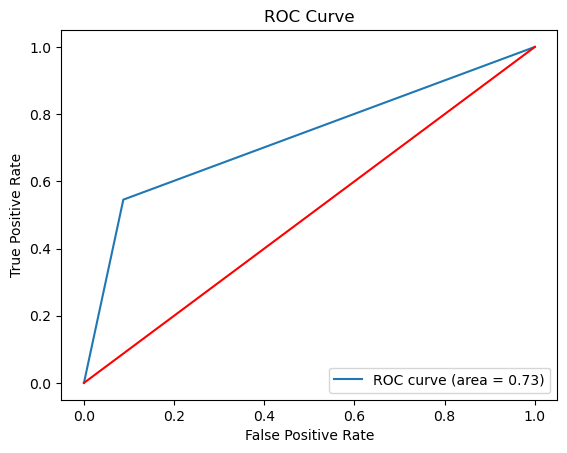

In [36]:
from sklearn.svm import SVC

clf_svm = SVC(
    kernel="rbf",
    C=10,
    gamma=0.01,
    random_state=42,
    class_weight={
        0: len(y_train) / (2 * sum(y_train == 0)),
        1: len(y_train) / (2 * sum(y_train == 1)),
    },
)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
eval_plot(y_test, y_pred)

## Third Method:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       229
           1       0.21      0.27      0.24        11

    accuracy                           0.92       240
   macro avg       0.59      0.61      0.60       240
weighted avg       0.93      0.92      0.93       240

test accuracy: 0.9208333333333333


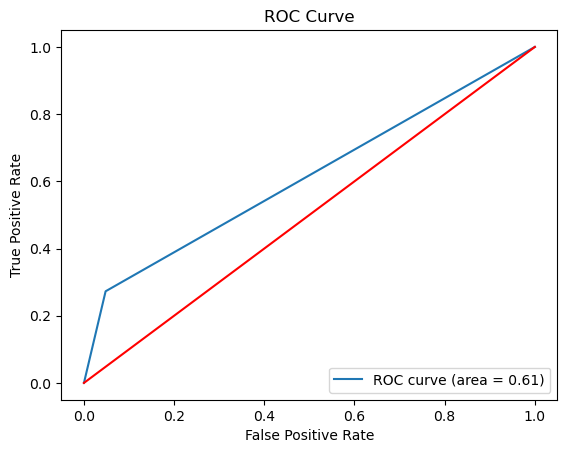

In [33]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(hidden_layer_sizes=(200, 200), max_iter=300, random_state=42)
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
eval_plot(y_test, y_pred)

## Conclusions and Perspectives:

I choose 3 models to do the classification Xgboost, SVC with rbf kernel and MLP then shows their performance matrix and ROC plots. 

**The conclusions from the results:**

1. None of them appears a good performance on this dataset, they did a good work on the class 0 (class 1 in the original dataset) but for class 1 (class 2 in the original dataset), the presion is only about 20% and recall is lower than 50%
2. MLP achieves the highest accuracy but the area under ROC curve is the smallest, it appears that it doesn't distinguish well the two classes
3. XGB could tell the two different classes better however the accuracy is still a problem
4. If consider using one of them as the final model to do the classification, SVC is my choice from the generative perpective

**Perspectives:**

1. The result repects to the EDA conclusions, it is affected by the inbalanced targets and complex data pattern. Claas 1 (2 in the original dataset) takes a small portion, the model doesn't have enough data to learn and predict it. It explains why all models appear badly on the class 1 (2 in the original dataset).
2. Despite of the complexity of the dataset which we can't find obvious linear relations from the correlation and demension reduction sections, all models capture successfully the pattern of the dataset because the performance on the class 0 (1 in the original dataset) is pretty good and thanks to this high performance, the accuracy fools the reader who doesn't look at other detailed metrics like precison, recall and f1.
3. When building the models, I've considered the above concerns by gave more weights to class 1, however it doesn't show too much improvement on the precision but the recall rate (XGB, SVC) is improved compared with MLP

**Memo**

1. When checking this inbalanced dataset, I considered using over and under sampling but didn't apply them because it is a small dataset, I am afraid of these methods could change the distribution of data a lot, so I chose the weight method eventually.
2. Honesly, I am surprised the SVC beaten the XGB, I thought ensemble learning could be better than single classifier